##### 복습할 것
- Slicing, Iterating, Indexing


In [7]:
#Slicing
nums=range(5)
print(nums)
print(nums[2:4])
print(nums[2:])
print(nums[:])
print(nums[:-1])

range(0, 5)
range(2, 4)
range(2, 5)
range(0, 5)
range(0, 4)


#### Loding data from file

In [2]:
cd /content/drive/MyDrive/모두의 딥러닝

/content/drive/MyDrive/모두의 딥러닝


In [3]:
import numpy as np

xy=np.loadtxt('./data/data-01-test-score.csv',delimiter=',',dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

print(x_data.shape,x_data,len(x_data))
print(y_data.shape,y_data)


(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


#### Output

In [20]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)

xy=np.loadtxt('./data/data-01-test-score.csv',delimiter=',',dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

print(x_data.shape,x_data,len(x_data))
print(y_data.shape,y_data)

X=tf.placeholder(tf.float32,shape=[None,3])
Y=tf.placeholder(tf.float32,shape=[None,1])

W=tf.Variable(tf.random_normal([3,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.matmul(X,W)+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
  cost_val,hy_val,_=sess.run([cost,hypothesis,train],
                             feed_dict={X:x_data,Y:y_data})
  if step%10==0:
    print(step,'Cost: ',cost_val,'\nPrediction: \n',hy_val)

print("Your score will be ",sess.run(hypothesis,feed_dict={X:[[100,70,101]]}))
print('Other scores will be ',sess.run(hypothesis,feed_dict={X: [[60,70,110],[90,100,80]]}))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [162.89859 ]
 [192.32187 ]]
160 Cost:  42.10169 
Prediction: 
 [[157.13528]
 [184.01764]
 [183.88364]
 [198.2484 ]
 [141.00941]
 [100.69627]
 [147.07591]
 [107.23527]
 [168.60628]
 [151.56323]
 [142.3304 ]
 [137.5635 ]
 [191.83884]
 [162.08408]
 [146.83969]
 [185.31145]
 [155.30946]
 [176.1705 ]
 [183.95872]
 [164.85423]
 [172.3214 ]
 [171.10785]
 [165.284  ]
 [162.84651]
 [192.3165 ]]
170 Cost:  41.798306 
Prediction: 
 [[157.11412 ]
 [184.02321 ]
 [183.87207 ]
 [198.24908 ]
 [141.01042 ]
 [100.721146]
 [147.0875  ]
 [107.258354]
 [168.63493 ]
 [151.62192 ]
 [142.33714 ]
 [137.58894 ]
 [191.81381 ]
 [162.04637 ]
 [146.85739 ]
 [185.32692 ]
 [155.26706 ]
 [176.18556 ]
 [183.92798 ]
 [164.82579 ]
 [172.33467 ]
 [171.12405 ]
 [165.29022 ]
 [162.79466 ]
 [192.31116 ]]
180 Cost:  41.49752 
Prediction: 
 [[157.09306 ]
 [184.0288  ]
 [183.86057 ]
 [198.24977 ]
 [141.01144 ]
 [100.745895]
 [147.09901 ]
 [107.28137 ]
 [168.66347 ]
 [151.68033 ]
 [142.34387 

#### Queue Runners
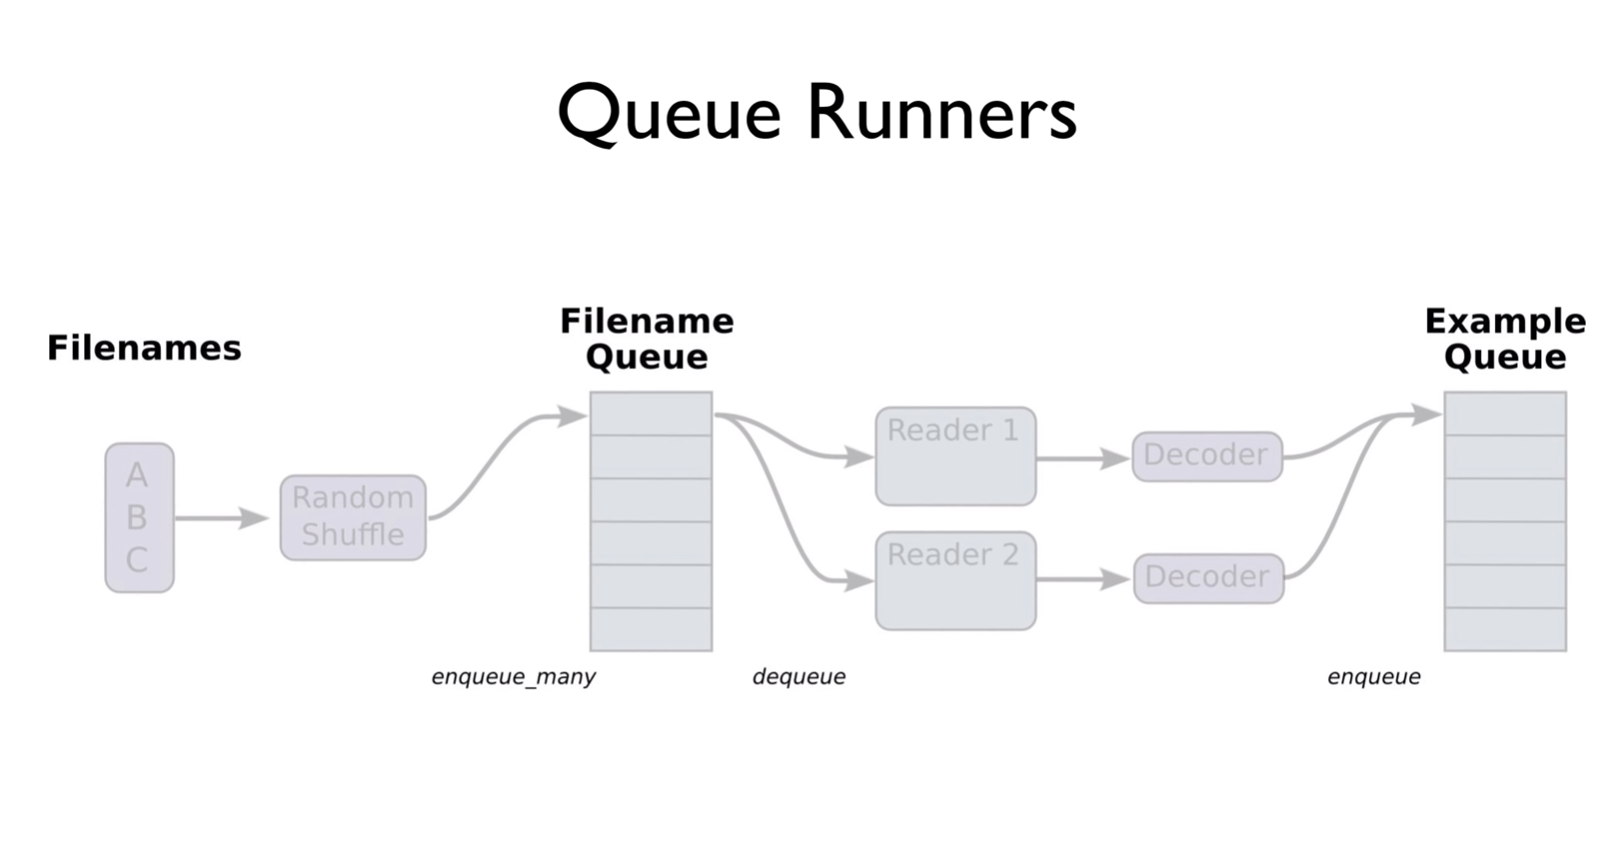


*파일이 너무 커서 메모리에 한번에 올리기 힐들 때?*
-> numpy를 이용하기는 힘들다.
#### Queue Runners 
- 텐서플로우에서 제공하는 시스템
- 여러개의 파일에서 읽어올 때 큐에 쌓은 후 Reader로 연결하여 양식에 맞게 Decoder를 한다.
- 필요한 batch만큼 큐에서 읽어와서 학습을 시킨다.
- 큰 데이터를 읽고 쓸 때 유용

In [28]:

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

tf.set_random_seed(777)

# 파일들의 리스트를 만들어 준다.
filename_queue=tf.train.string_input_producer(['data-01-test-score.csv'],shuffle=False,
                                              name='filename_queue')
# 파일을 읽어 올 Reader 정의
reader=tf.TextLineReader()
key,value=reader.read(filename_queue)

# value 값을 어떻게 parsing할 것인가->decode_csv를 통해서 한다.
record_defaults=[[0.],[0.],[0.],[0.]]
xy=tf.decode_csv(value,record_defaults=record_defaults)
#recode_defaults: 읽어올 때 필드에 대한 값이 어떤 데이터 타입인가를 정해줄 수 있다.

train_x_batch,train_y_batch=tf.train.batch([xy[0:-1],xy[-1:]],batch_size=10)

X=tf.placeholder(tf.float32,shape=[None,3])
Y=tf.placeholder(tf.float32,shape=[None,1])

W=tf.Variable(tf.random_normal([3,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
hypothesis=tf.matmul(X,W)+b

#Simplified cost/Loss function
cost=tf.reduce_mean(tf.square(hypothesis-Y))

#Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)


sess=tf.Session()

sess.run(tf.global_variables_initializer())

# Start Populating the filename queue.
coord=tf.train.Coordinator()
threads=tf.train.start_queue_runners(sess=sess,coord=coord)

#session안에서 batch를 펌프질 하듯이 데이터를 뽑아온다.
for step in range(2001):
    x_batch,y_batch=sess.run([train_x_batch,train_y_batch])
    cost_val,hy_val,_=sess.run([cost,hypothesis,train],
                             feed_dict={X:x_batch,Y:y_batch})
    if step%10==0:
      print(step,"Cost: ",cost_val,"\nPrediction:\n",hy_val)
coord.request_stop()
coord.join(threads)

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.NotFoundError'>, data-01-test-score.csv; No such file or directory
	 [[{{node ReaderReadV2}}]]


OutOfRangeError: ignored